<a href="https://colab.research.google.com/github/zzeeddd95/capstone-project/blob/master/Decisiontreeregressoramazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import pandas_datareader as web
import matplotlib.pyplot as plt
plt.style.use('bmh')


In [3]:
from google.colab import files
apple = files.upload()

Saving AMZN.csv to AMZN.csv


In [4]:
amzn = pd.read_csv('AMZN.csv')
amzn.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-05-26,125.050003,125.790001,122.300003,123.209999,123.209999,6964600
1,2010-05-27,124.980003,126.849998,120.599998,126.699997,126.699997,4747700
2,2010-05-28,126.070000,127.599998,124.010002,125.459999,125.459999,3954800
3,2010-06-01,124.970001,126.570000,123.019997,123.239998,123.239998,3659500
4,2010-06-02,124.019997,126.430000,121.650002,126.309998,126.309998,4764700
5,2010-06-03,126.250000,129.149994,124.849998,128.759995,128.759995,5276900


In [5]:
amzn.shape

(2516, 7)

In [6]:
#Filter out data to only obtain close price (independant variable)
amzn = amzn[['Close']]
amzn

,Close
0,123.209999
1,126.699997
2,125.459999
3,123.239998
4,126.309998
...,...
2511,2426.260010
2512,2449.330078
2513,2497.939941
2514,2446.739990


In [7]:
#Create a variable to allow for predicting 'n days' into the future
future_out =365

In [8]:
#Create the dependant variable which will be shifted 'n' units up
amzn['Prediction'] = amzn[['Close']].shift(-future_out)
amzn.tail()

,Close,Prediction
2511,2426.260010,NaN
2512,2449.330078,NaN
2513,2497.939941,NaN
2514,2446.739990,NaN
2515,2436.879883,NaN


In [9]:
#create independant data set by converting the dataframe to a numpy array
amzndfx = np.array(amzn.drop(['Prediction'],1))
#Renove the last 'n' rows
amzndfx = amzndfx[:-future_out] #therefore for every column, all of the rows will be displayed - future out
amzndfx

array([[ 123.209999],
       [ 126.699997],
       [ 125.459999],
       ...,
       [1699.189941],
       [1629.130005],
       [1641.030029]])

In [10]:
#creat dependant dataset (prediction), all values including any Nan's
amzndfy = np.array(amzn['Prediction'])
#Filter this data by obtaining all values except the last 'n' rows
amzndfy = amzndfy[:-future_out]
print(amzndfy)

[ 218.289993  216.479996  217.       ... 2497.939941 2446.73999
 2436.879883]


In [12]:
#split data into 80% training and 20%testing
amzndfx_train , amzndfx_test, amzndfy_train, amzndfy_test = train_test_split(amzndfx, amzndfy, test_size = 0.20)

In [13]:
#Create and train the decision tree regressor model
tree = DecisionTreeRegressor().fit(amzndfx_train,amzndfy_train)

In [14]:
#test model accuracy via score which returns the coefficient of determination (R^2) of prediction
treeconfidence = tree.score(amzndfx_test, amzndfy_test)
print("Decision tree regressor confidence", treeconfidence)

Decision tree regressor confidence 0.942779312460494


In [15]:
#set apple_forecast = to the last 365 rows of original dataset from close price column
amzn_forecast = np.array(amzn.drop(['Prediction'],1))[-future_out:]
print(amzn_forecast)


[[1643.23999 ]
 [1663.540039]
 [1658.380005]
 [1591.910034]
 [1520.910034]
 [1551.47998 ]
 [1495.079956]
 [1460.829956]
 [1377.449951]
 [1343.959961]
 [1470.900024]
 [1461.640015]
 [1478.02002 ]
 [1501.969971]
 [1539.130005]
 [1500.280029]
 [1575.390015]
 [1629.51001 ]
 [1656.579956]
 [1659.420044]
 [1656.219971]
 [1640.560059]
 [1617.209961]
 [1674.560059]
 [1683.780029]
 [1693.219971]
 [1696.199951]
 [1632.170044]
 [1640.02002 ]
 [1654.930054]
 [1670.569946]
 [1637.890015]
 [1593.880005]
 [1670.430054]
 [1718.72998 ]
 [1626.22998 ]
 [1633.310059]
 [1658.810059]
 [1640.26001 ]
 [1614.369995]
 [1588.219971]
 [1591.      ]
 [1638.01001 ]
 [1640.      ]
 [1622.650024]
 [1607.949951]
 [1627.579956]
 [1622.099976]
 [1619.439941]
 [1631.560059]
 [1633.      ]
 [1636.400024]
 [1641.089966]
 [1639.829956]
 [1671.72998 ]
 [1696.170044]
 [1692.430054]
 [1668.949951]
 [1625.949951]
 [1620.800049]
 [1670.619995]
 [1673.099976]
 [1690.810059]
 [1686.219971]
 [1712.359985]
 [1742.150024]
 [1761.849

In [16]:
#Print decision tree predicted values for upcoming 'n' days
treeprediction = tree.predict(amzn_forecast)
print(treeprediction)

[2266.1800535 1740.47998   1749.51001   1757.51001   1832.890015
 1801.380005  2351.26001   1732.660034  1843.550049  1973.819946
 1823.23999   1866.780029  1765.130005  2379.610107  2283.320068
 1793.400024  1761.329956  2446.73999   1749.51001   1749.51001
 1749.51001   2436.879883  1788.199951  2388.850098  1752.790039
 1760.939941  1754.599976  2372.709961  2436.879883  1749.51001
 2449.330078  2314.080078  1757.51001   2449.330078  1955.48999
 1785.880005  2372.709961  1749.51001   2436.879883  1788.199951
 1776.290039  1768.869995  2314.080078  2436.879883  1785.880005
 1785.660034  2328.120117  1785.880005  1785.880005  2372.709961
 2372.709961  2314.080078  2436.879883  2436.879883  2388.850098
 1754.599976  1760.939941  2449.330078  1785.880005  1785.880005
 2449.330078  2388.850098  1752.530029  1752.790039  2376.
 1792.280029  1963.949951  1793.        1901.050049  1906.589966
 2426.26001   2042.76001   1906.589966  2426.26001   2042.76001
 1789.209961  1789.209961  1868.770

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


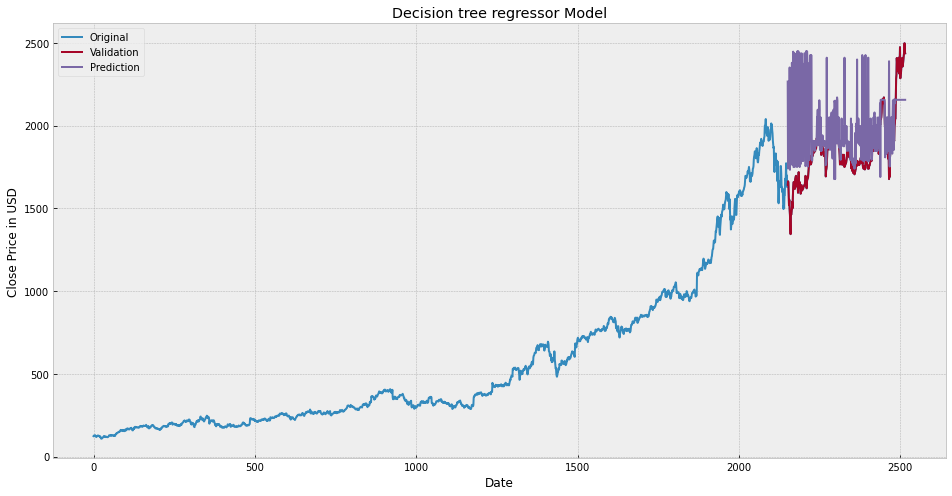

In [17]:
prediction = treeprediction
valid = amzn[amzndfx.shape[0]:]
valid['Prediction'] = prediction
plt.figure(figsize = (16,8))
plt.title ('Decision tree regressor Model')
plt.xlabel('Date')
plt.ylabel('Close Price in USD')
plt.plot(amzn['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Original','Validation','Prediction'])
plt.show()